A brief analysis on the air quality of India from 2015-2020. In this Notebook I will be using air quality india Datasets from kaggle and I will be going step by step analysis of the table, Plotting the hsitogram, graphs of few table. In this Notebook I have calculated AQI of Mumbai division which has 10 Stations. Imported a CSV of this data as well.

In [238]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [239]:
import os
for dirname, _, filenames in os.walk('/pandas/air-quality-data-in-india'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/pandas/air-quality-data-in-india\airqualitydata.ipynb
/pandas/air-quality-data-in-india\city_day.csv
/pandas/air-quality-data-in-india\city_hour.csv
/pandas/air-quality-data-in-india\demo_data.csv
/pandas/air-quality-data-in-india\Mumbai_station_AQI.csv
/pandas/air-quality-data-in-india\stations.csv
/pandas/air-quality-data-in-india\station_day.csv
/pandas/air-quality-data-in-india\station_hour.csv


In [240]:
city_hour = pd.read_csv('/pandas/air-quality-data-in-india/city_hour.csv')
station_day = pd.read_csv('/pandas/air-quality-data-in-india/station_day.csv')
station_hour = pd.read_csv('/pandas/air-quality-data-in-india/station_hour.csv')
stations_path = pd.read_csv('/pandas/air-quality-data-in-india/stations.csv')

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [241]:
city_day = pd.read_csv('/pandas/air-quality-data-in-india/city_day.csv').sort_values(by = ['Date', 'City'])
print(list(city_day.columns))  #printing city_day columns 

['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [242]:
city_day.head() # So here as we can see we have some null values

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
4294,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,0.56,4.64,NaN,NaN,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN,NaN
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
19846,Lucknow,2015-01-01,NaN,NaN,2.11,13.46,4.57,NaN,12.15,169.57,25.92,1.35,3.93,NaN,NaN,NaN


We will be getting rid of these null values. first lets see which column has the most null values!

In [243]:
city_day.isnull().sum() #So PM10 & Xylene has the most number of null values.

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [244]:
city_day['AQI_Bucket'].value_counts(ascending= True)

Severe          1338
Good            1341
Very Poor       2337
Poor            2781
Satisfactory    8224
Moderate        8829
Name: AQI_Bucket, dtype: int64

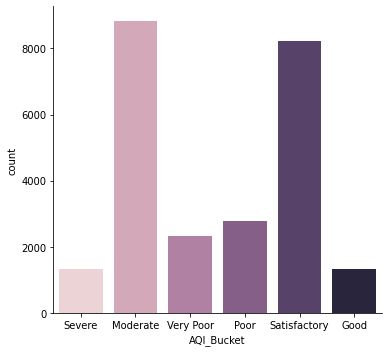

In [245]:
sns.catplot(x = "AQI_Bucket", kind= "count", palette = "ch: 2.87", height=5, aspect=1.1, data = city_day) 
#Mainly there are six categories of AQI which we observe: Good, Satisfactory, Moderate, Poor, Very Poor and Severe.

In [246]:
#The above data is having Null values. Let's Dropna !
city_day = city_day.dropna(axis = 0, subset = ['PM10'])
city_day = city_day.dropna(axis = 0, subset = ['Xylene'])
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7314 entries, 10229 to 25721
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        7314 non-null   object 
 1   Date        7314 non-null   object 
 2   PM2.5       7210 non-null   float64
 3   PM10        7314 non-null   float64
 4   NO          7306 non-null   float64
 5   NO2         7234 non-null   float64
 6   NOx         7226 non-null   float64
 7   NH3         6906 non-null   float64
 8   CO          7257 non-null   float64
 9   SO2         7149 non-null   float64
 10  O3          7124 non-null   float64
 11  Benzene     7312 non-null   float64
 12  Toluene     7314 non-null   float64
 13  Xylene      7314 non-null   float64
 14  AQI         7145 non-null   float64
 15  AQI_Bucket  7145 non-null   object 
dtypes: float64(13), object(3)
memory usage: 971.4+ KB


<AxesSubplot:xlabel='City'>

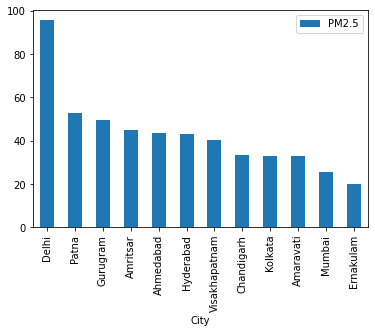

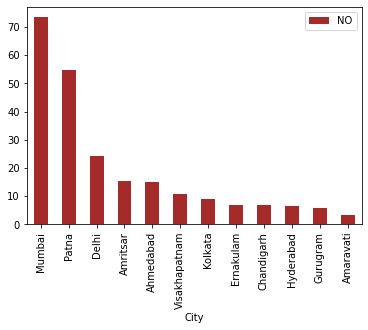

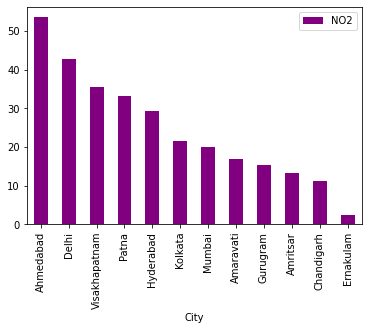

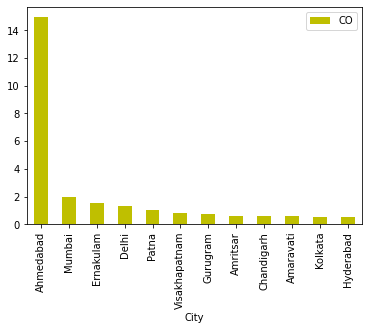

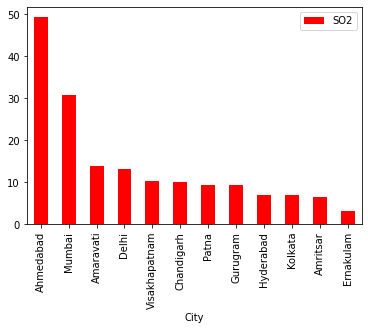

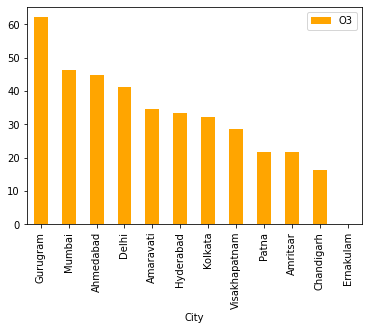

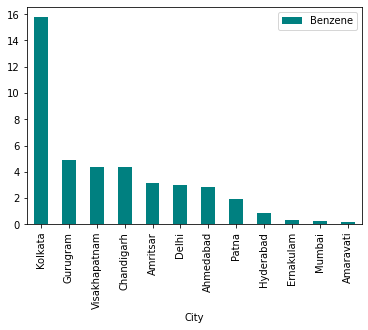

In [247]:
#We would analyse the contribution of these major pollutants city-wise.
city_day[['PM2.5', 'City']].groupby(['City']).median().sort_values("PM2.5", ascending = False).plot.bar()
city_day[['NO', 'City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='brown')
city_day[['NO2', 'City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='purple')
city_day[['CO', 'City']].groupby(['City']).median().sort_values("CO", ascending = False).plot.bar(color='y')
city_day[['SO2', 'City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar(color='r')
city_day[['O3', 'City']].groupby(['City']).median().sort_values("O3", ascending = False).plot.bar(color='orange')
city_day[['Benzene', 'City']].groupby(['City']).median().sort_values("Benzene", ascending = False).plot.bar(color='teal')

Delhi has the highest levels of PM2.5 whereas Mumbai and Ernakulam turn out to be on the other side of the table. Major reasons behind the rise of PM2.5 levels in Delhi are increasing traffic, dust and smoke from fires.
Mumbai has the highest levels of NO whereas Gurugram and Amaravati have quite minimal figures. Major spike of NO in the commercial capital of India are causing respiratory ailments, hematologic side effects, metabolic disorders, low blood pressure, nausea, vomiting and diarrhoea.
Ahmedabad has the highest stake when nitrogen dioxides, sulphur dioxides and carbon monoxide is concerned, whereas Gurugram and Kolkata are the most polluted due to ozone and benzene respectively. On a broader view, Ernakulam and Amaravati seem to be less hazardous compared to other mid-tier and top-tier cities.

In [248]:
!pip install jinja2 #Installing the Jinja2 template 
def missing_value_table(df):
    values = df.isnull().sum()
    percentage = 100*df.isnull().sum()/len(df)
    table = pd.concat([values,percentage.round(2)],axis=1)
    table.columns = ['No of missing values','% of missing values']
    return table[table['No of missing values']!=0].sort_values('% of missing values',ascending=False).style.background_gradient('Greens')

missing_value_table(pd.read_csv('/pandas/air-quality-data-in-india/city_day.csv'))

ERROR: Invalid requirement: '#Installing'


,No of missing values,% of missing values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


In [249]:
#Let us see the cities with most pollution withn few polluted gas
most_polluted = city_day[['City', 'AQI', 'PM10', 'CO']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City,,,
Ahmedabad,368.715068,114.719120,17.538213
Delhi,251.439283,222.772461,2.181948
Patna,169.356021,126.747958,1.156911
Gurugram,127.966387,113.500672,0.766134
Amritsar,122.896226,117.247610,0.607484
Visakhapatnam,117.092561,105.983967,0.846958
Kolkata,113.979695,93.489772,0.687157
Hyderabad,104.966810,91.888423,0.543222
Amaravati,100.586989,81.475660,0.617922


We'll use one city (Mumbai in Maharashtra) that has two stations and compare it with the actual AQI values present in the data at station, city, hour and day level to confirm the calculations are correct.
To calculate Air quality Index there is a formula below.

In [250]:
from IPython.display import Image
Image(url= "https://i.imgur.com/vQR5Zy0.png", width=800, height=400)

In [251]:
STATIONS = ["MH005", "MH006","MH007", "MH008","MH009", "MH010","MH011", "MH012","MH013", "MH014",]   # We will be using Mumbai as it has 10 stations. You can try it with any stations!

In [252]:
PATH_STATION_HOUR = "/pandas/air-quality-data-in-india/station_hour.csv"
PATH_STATION_DAY = "/pandas/air-quality-data-in-india/station_day.csv"
PATH_CITY_HOUR = "/pandas/air-quality-data-in-india/city_hour.csv"
PATH_CITY_DAY = "/pandas/air-quality-data-in-india/city_day.csv"
PATH_STATIONS = "/pandas/air-quality-data-in-india/stations.csv"


In [253]:
## importing data and subsetting the station
df = pd.read_csv(PATH_STATION_HOUR, parse_dates = ["Datetime"])
stations = pd.read_csv(PATH_STATIONS)

df = df.merge(stations, on = "StationId")

df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

C:\Users\abhis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


The AQI calculation uses 7 measures: PM2.5, PM10, SO2, NOx, NH3, CO and O3.
For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.
For CO and O3 the maximum value in last 8-hrs is used.
Each measure is converted into a Sub-Index based on pre-defined groups.
Sometimes measures are not available due to lack of measuring or lack of required data points.
Final AQI is the maximum Sub-Index with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

In [254]:
#first calculate the average of all the measures.
df["PM10_24hr_avg"] = df.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df["PM2.5_24hr_avg"] = df.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df["SO2_24hr_avg"] = df.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df["NOx_24hr_avg"] = df.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df["NH3_24hr_avg"] = df.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df["CO_8hr_max"] = df.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df["O3_8hr_max"] = df.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

In [255]:
# PM2.5 (Particulate Matter 2.5-micrometer)
# PM2.5 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

In [256]:
# PM10 (Particulate Matter 10-micrometer)
# PM10 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [257]:
# SO2 (Sulphur Dioxide)
# SO2 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [258]:
# NOx (Any Nitric x-oxide)
# NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [259]:
# NH3 (Ammonia)
# NH3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [260]:
# CO (Carbon Monoxide)
# CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [261]:
# O3 (Ozone or Trioxygen)
# O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

AQI
The final AQI is the maximum Sub-Index among the available sub-indices with the condition that at least one of PM2.5 and PM10 should be available and at least three out of the seven should be available.

There is no theoretical upper value of AQI but its rare to find values over 1000.

Finalizing the AQI by adding into the table

In [262]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
main_dataframe=df[~df.AQI_calculated.isna()].head(13)
main_dataframe

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1727113,MH005,2018-05-07 03:00:00,9.62,NaN,17.69,15.30,33.00,NaN,1.25,21.62,...,26.244792,0.0,30.975781,42.457812,0.0,71.5,42.61,5,72.0,Satisfactory
1727114,MH005,2018-05-07 04:00:00,14.05,NaN,17.83,14.05,31.88,NaN,1.24,23.09,...,26.078431,0.0,30.851471,42.304412,0.0,71.5,42.61,5,72.0,Satisfactory
1727115,MH005,2018-05-07 05:00:00,16.25,NaN,18.09,14.62,32.71,NaN,1.24,22.86,...,26.134259,0.0,30.725000,42.225694,0.0,69.5,37.07,5,70.0,Satisfactory
1727116,MH005,2018-05-07 06:00:00,13.34,NaN,51.06,38.45,89.51,NaN,1.39,18.74,...,25.928947,0.0,30.340789,45.892105,0.0,69.5,34.29,5,70.0,Satisfactory
1727117,MH005,2018-05-07 07:00:00,13.05,NaN,27.96,31.75,59.72,NaN,1.36,19.67,...,25.720000,0.0,30.053125,47.330000,0.0,69.5,33.89,5,70.0,Satisfactory
1727118,MH005,2018-05-07 08:00:00,19.98,NaN,77.46,44.30,121.77,NaN,1.61,22.02,...,26.080952,0.0,29.932738,52.324405,0.0,80.5,33.89,5,80.0,Satisfactory
1727119,MH005,2018-05-07 09:00:00,19.65,NaN,60.62,44.25,104.88,NaN,1.55,22.55,...,26.384091,0.0,29.853409,55.905114,0.0,80.5,33.89,5,80.0,Satisfactory
1727120,MH005,2018-05-07 10:00:00,21.10,NaN,17.86,21.79,39.65,NaN,1.30,24.64,...,26.765942,0.0,29.894565,55.629348,0.0,80.5,35.84,5,80.0,Satisfactory
1727121,MH005,2018-05-07 11:00:00,25.37,NaN,16.59,16.09,32.68,NaN,1.24,24.76,...,27.412500,0.0,29.938542,55.013542,0.0,80.5,35.84,5,80.0,Satisfactory
1727122,MH005,2018-05-07 12:00:00,7.76,NaN,16.69,15.70,32.39,NaN,1.23,24.75,...,26.600694,0.0,29.885938,54.933854,0.0,80.5,35.84,5,80.0,Satisfactory


In [263]:
df[~df.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

Satisfactory    32006
Moderate        31678
Good            18260
Poor             7441
Very Poor         734
Name: AQI_bucket_calculated, dtype: int64

In [264]:
main_dataframe.to_csv("Mumbai_station_AQI.csv")
main_dataframe


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
1727113,MH005,2018-05-07 03:00:00,9.62,NaN,17.69,15.30,33.00,NaN,1.25,21.62,...,26.244792,0.0,30.975781,42.457812,0.0,71.5,42.61,5,72.0,Satisfactory
1727114,MH005,2018-05-07 04:00:00,14.05,NaN,17.83,14.05,31.88,NaN,1.24,23.09,...,26.078431,0.0,30.851471,42.304412,0.0,71.5,42.61,5,72.0,Satisfactory
1727115,MH005,2018-05-07 05:00:00,16.25,NaN,18.09,14.62,32.71,NaN,1.24,22.86,...,26.134259,0.0,30.725000,42.225694,0.0,69.5,37.07,5,70.0,Satisfactory
1727116,MH005,2018-05-07 06:00:00,13.34,NaN,51.06,38.45,89.51,NaN,1.39,18.74,...,25.928947,0.0,30.340789,45.892105,0.0,69.5,34.29,5,70.0,Satisfactory
1727117,MH005,2018-05-07 07:00:00,13.05,NaN,27.96,31.75,59.72,NaN,1.36,19.67,...,25.720000,0.0,30.053125,47.330000,0.0,69.5,33.89,5,70.0,Satisfactory
1727118,MH005,2018-05-07 08:00:00,19.98,NaN,77.46,44.30,121.77,NaN,1.61,22.02,...,26.080952,0.0,29.932738,52.324405,0.0,80.5,33.89,5,80.0,Satisfactory
1727119,MH005,2018-05-07 09:00:00,19.65,NaN,60.62,44.25,104.88,NaN,1.55,22.55,...,26.384091,0.0,29.853409,55.905114,0.0,80.5,33.89,5,80.0,Satisfactory
1727120,MH005,2018-05-07 10:00:00,21.10,NaN,17.86,21.79,39.65,NaN,1.30,24.64,...,26.765942,0.0,29.894565,55.629348,0.0,80.5,35.84,5,80.0,Satisfactory
1727121,MH005,2018-05-07 11:00:00,25.37,NaN,16.59,16.09,32.68,NaN,1.24,24.76,...,27.412500,0.0,29.938542,55.013542,0.0,80.5,35.84,5,80.0,Satisfactory
1727122,MH005,2018-05-07 12:00:00,7.76,NaN,16.69,15.70,32.39,NaN,1.23,24.75,...,26.600694,0.0,29.885938,54.933854,0.0,80.5,35.84,5,80.0,Satisfactory


In [265]:
df_station_hour = df
df_station_day = pd.read_csv(PATH_STATION_DAY)

df_station_day = df_station_day.merge(df.groupby(["StationId", "Date"])["AQI_calculated"].mean().reset_index(), on = ["StationId", "Date"])
df_station_day.AQI_calculated = round(df_station_day.AQI_calculated)

In [266]:
df_city_hour = pd.read_csv(PATH_CITY_HOUR)
df_city_day = pd.read_csv(PATH_CITY_DAY)

df_city_hour["Date"] = pd.to_datetime(df_city_hour.Datetime).dt.date.astype(str)

df_city_hour = df_city_hour.merge(df.groupby(["City", "Datetime"])["AQI_calculated"].mean().reset_index(), on = ["City", "Datetime"])
df_city_hour.AQI_calculated = round(df_city_hour.AQI_calculated)

df_city_day = df_city_day.merge(df_city_hour.groupby(["City", "Date"])["AQI_calculated"].mean().reset_index(), on = ["City", "Date"])
df_city_day.AQI_calculated = round(df_city_day.AQI_calculated)

In [267]:
df_check_station_hour = df_station_hour[["AQI", "AQI_calculated"]].dropna()
df_check_station_day = df_station_day[["AQI", "AQI_calculated"]].dropna()
df_check_city_hour = df_city_hour[["AQI", "AQI_calculated"]].dropna()
df_check_city_day = df_city_day[["AQI", "AQI_calculated"]].dropna()

print("Station + Hour")
print("Rows: ", df_check_station_hour.shape[0])
print("Matched AQI: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum())
print("% Match: ", (df_check_station_hour.AQI == df_check_station_hour.AQI_calculated).sum() * 100 / df_check_station_hour.shape[0])
print("\n")
print("Station + Day")
print("Rows: ", df_check_station_day.shape[0])
print("Matched AQI: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum())
print("% Match: ", (df_check_station_day.AQI == df_check_station_day.AQI_calculated).sum() * 100 / df_check_station_day.shape[0])
print("\n")
print("City + Hour")
print("Rows: ", df_check_city_hour.shape[0])
print("Matched AQI: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum())
print("% Match: ", (df_check_city_hour.AQI == df_check_city_hour.AQI_calculated).sum() * 100 / df_check_city_hour.shape[0])
print("\n")
print("City + Day")
print("Rows: ", df_check_city_day.shape[0])
print("Matched AQI: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum())
print("% Match: ", (df_check_city_day.AQI == df_check_city_day.AQI_calculated).sum() * 100 / df_check_city_day.shape[0])

Station + Hour
Rows:  90119
Matched AQI:  90098
% Match:  99.97669747777938


Station + Day
Rows:  3872
Matched AQI:  3872
% Match:  100.0


City + Hour
Rows:  18171
Matched AQI:  18169
% Match:  99.98899345110341


City + Day
Rows:  775
Matched AQI:  775
% Match:  100.0


Yup! That looks perfect.